# Step-by-step mini tutorial on Machine learning using Python

First we need to import the libraries we will be using

In [1]:
# pandas for data manipulation
import pandas

# plotting purposes
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1.  Loading the data set
In this case we will be working with the iris data set. Since we are using seaborn and we have already lodaded the library we will load the data set directly from  `sns`

In [2]:
my_data = sns.load_dataset('iris')

## 2. Summarising and pre-processing the data set

We will start by exploring the data, some of the things we will be doing include:
1. Have a look at the data contained in the data set
2. Find out the dimensions of the data set
3. Perform a basic statistical summary of the data
4. Break the data down by the `species` variable (note in machine learning this is usually referred to as the *class*)

### 2.1 Data set dimension
We can have a very quick look at number of instances and attributes (rows and columns respectively) conatined in the data set

In [3]:
# Getting the shape 
print(my_data.shape)

(150, 5)


### 2.2 Exploring the contained data
We start by looking at the kind of data types included in the set as well as 'eyeballing' the data

In [4]:
# Getting info on the data contained
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# seeing the first 20 rows of the data
# note the dafult no. of rows shown is 10, here 
# we overwrote this by specifying the no. of columns
my_data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 2.3 Statistical summary
The next step will be to perform a basic statistical summary of the data attributes. 

This will contain the counts, mean, minimum, maximum and the main percentiles.


In [6]:
my_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In this particular case all the numerical values have the same scale (cm)

### 2.4 Class distribution
Now we will have a look at the number of rows that belong to each species. 

In [7]:
my_data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Each species contains 50 instances, which is around 33% of the data set.

## 3. Data Visualization 

Now that we have a basic idea of the data contained in the dataset we will create some plots that will help us to understant the information contained in the set.

There are 2 kinds of plots we will be working with:
1. Univariate plots: explore only one attribute at a time
2. Multivariate plots: unveil the relationship between attributes

### 3.1 Univariate plots

First I am going to specify the color palette I will be using. 
You can only use the default template provided by seaborn or change it directly for each plot. 

In my case I am going to select the color palette by calling the palette widget on the ColorBrewer palettes:

In [8]:
palette = sns.choose_colorbrewer_palette('qualitative')

First we need to specify that we want the plots to be displayed in line

In [9]:
%matplotlib inline

Then we define some seaborn preferences, you can modify as you wish.

In [11]:
sns.set_palette(palette)
sns.set_context('notebook', font_scale = 1.5)
sns.set_style('darkgrid')

**Box plot**


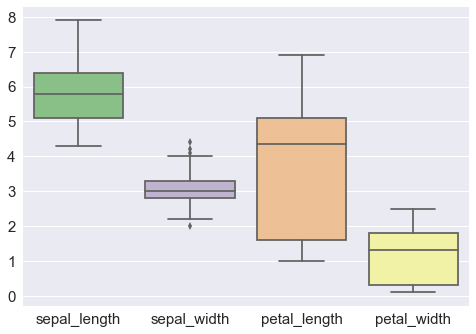

In [12]:
b = sns.boxplot(data =  my_data)

**Histogram**


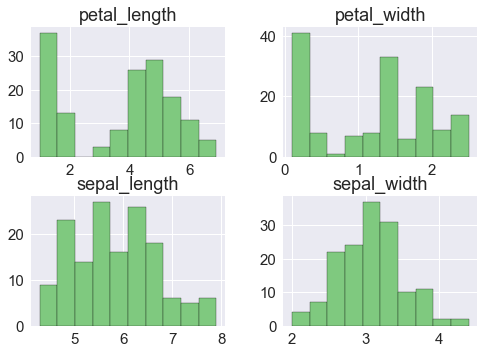

In [13]:
h = my_data.hist(edgecolor = 'black')

### 3.2 Multivariate plots

Now we will starta having a look at the relationship between the variables.

First let have a look at the scatterplots of all pair of attributes. This will allow us to see the relationship between the variables.

/Volumes/apilolli/tania/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


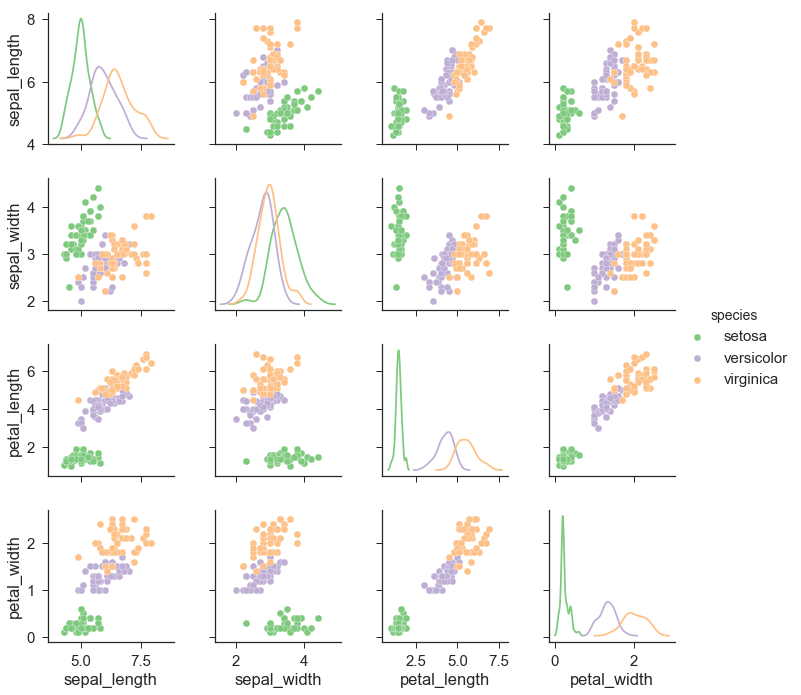

In [37]:
 with sns.axes_style('ticks'):
    p = sns.pairplot(my_data, hue = 'species', diag_kind = 'kde');


The diagonal groups pairs of attributes, note we can use `hist` or `kde` types for the diagonal plots. We can further visualize ths correlation using scatter plots

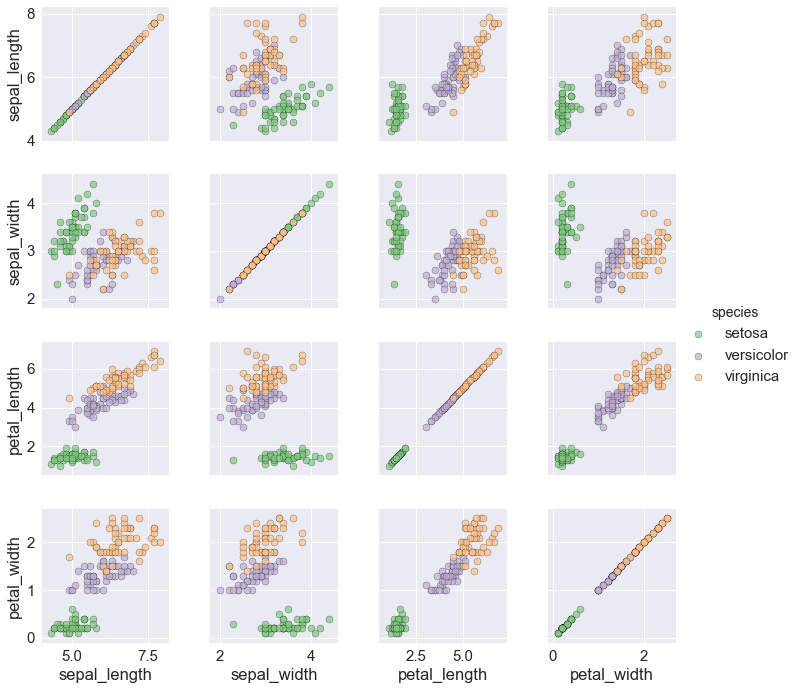

In [38]:
g = sns.PairGrid(my_data, hue = 'species')
g.map(plt.scatter, edgecolor = 'black', alpha = 0.7)
g.add_legend();

Note that by deafult the seaborn `pairGrid` function uses Histograms on the diagonal relationships while `facetgrid` is not limited to histograms.

## 4. Evaluating some algorithms

We will use some algorithms here and evaluate their accuracy on the data set.



### 4.1 Create a validation data set
We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [21]:
# Splitting the data

array = my_data.values

# data vaues
X = array[:,0:4]

# corresponds to the species (the target of the data set)
Y = array[:,4]

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Now we have a training data contained in `X_train` and `Y_train` as well as validation sets (`Y_validation`, `X_validation`)

### 4.3 Test harness

In this case I have chosen to use a 10-fold cross validation to estimate the accuracy of the models. 

This means that we will split the dataset in 10 different subsets: 9 to train and 1 for testing and repeat for all combination of train/test splits.

In [22]:
seed = 7

# this will be used later to evaluate each algorithm
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. 

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). 

$$accuracy = \frac{correct_{pred}}{total_{inst}} x 100$$


###  4.3 Building the models


6 different algorithms are considered:
1. Logistic regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-nearest Neighbours (KNN)
4. Classification trees (CT)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

Such algorithms provide a nice mixture of linear and non-linear algorithms. 

We will use a random seed before each run to ensure that theevaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable 

In [23]:
# Building the algorithms
alg = []

alg.append(('LR', LogisticRegression()))
alg.append(('LDA', LinearDiscriminantAnalysis()))
alg.append(('KNN', KNeighborsClassifier()))
alg.append(('CT', DecisionTreeClassifier()))
alg.append(('NB', GaussianNB()))
alg.append(('SVM', SVC()))

In [24]:
# Evaluate each algorithm
results = []
alias_alg = []

for name, algorithm in alg:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(algorithm, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    alias_alg.append(name)
    
    status = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(status)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CT: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


From the initial results we can see that 'KNN' and 'LDA' have the highest estimation accuracy. 

We are now going to create a plot of the algorithms results and compare their mean accuracy. 

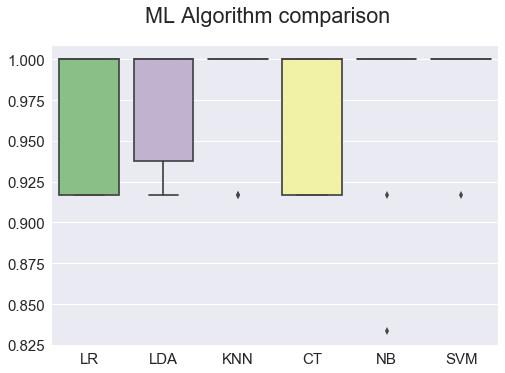

In [36]:
fig, ax = plt.subplots()
ax = sns.boxplot(data = results).set_xticklabels(alias_alg)
fig.suptitle('ML Algorithm comparison');

## 5 Making  predictions 

The KK algorithm seems to be the most accurate model when used on the training data sets. 

Now we will apply the models on the validation sets. This will give us an indication of the algorithm accuracy. 

It is often advisable to keep a validation data set in case you over fit the training data set. 

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [27]:
# Making predictions

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

predictions = knn.predict(X_validation)


In [28]:
print(accuracy_score(Y_validation, predictions))

0.9


The accuracy is around 0.9 (90%). Now we will have a look  at the confusion matrix.

In [29]:
cm = confusion_matrix(Y_validation, predictions)
print(cm)


[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


This matrix provides information on:
1. The number of correct predictions for each class (in this case the species)
2. The number of incorrect predictions for each class (arranged by the class they predicted)

These counts are organized as seen above in a matrix as follows:
* **Expected down the side**: each row of the matrix corresponds to an actual class
* **Predicted across the top**: each column represents a predicted class


It might be worth then plotting the confusion matrix to better understand this

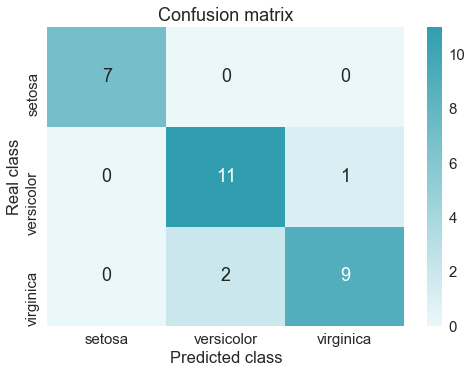

In [35]:
# changing the colormap
my_cmap = sns.light_palette((210, 90, 60), input="husl", as_cmap=True)


ax = sns.heatmap(cm, annot= True, xticklabels= my_data.species.unique(),
                yticklabels= my_data.species.unique(), cmap = my_cmap)

# setting axes and plot titles
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')
ax.set_title('Confusion matrix');

We could as well normalize the confusion matrix:

In [39]:
cm_n = cm / cm.sum()

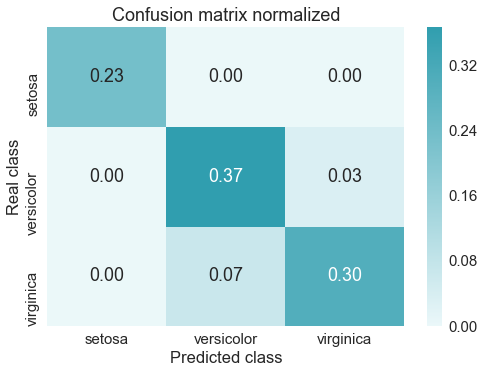

In [33]:
# plotting the normalized confusion matrix
ax = sns.heatmap(cm_n, annot= True, fmt = '.2f', xticklabels= my_data.species.unique(),
                yticklabels= my_data.species.unique(), cmap = my_cmap)

# setting axes and plot titles
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')
ax.set_title('Confusion matrix normalized');